In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from scipy.spatial.distance import jensenshannon
from scipy.stats import gaussian_kde
from transformers import GPT2Tokenizer, GPT2LMHeadModel

from utils.retrieval import get_activations, extract_weights

2025-06-23 17:39:41.576377: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 17:39:41.597713: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gpt2_version = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_version)
model = GPT2LMHeadModel.from_pretrained(gpt2_version, output_hidden_states=True, return_dict_in_generate=True)

In [3]:
# constants of the model
TOTAL_VOCAB_SIZE = tokenizer.vocab_size
EMBEDDING_DIMENTIONS = 768
MAXIMUM_INPUT_LENGTH = 1024
N_BLOCKS = 12

In [4]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [5]:
# generating random prompts of a fixed token size
n_tokens = 100
n_prompts = 100
prompts = [torch.randint(0, TOTAL_VOCAB_SIZE, size = (1, n_tokens)) for _ in range(n_prompts)]

In [6]:
# registering the hooks and initializing the dict to store all activations
activations = get_activations(model)

In [7]:
# runnning all the prompts to obtain all activations
for prompt in prompts:
    with torch.no_grad():
        _ = model(prompt)

In [8]:
# extracting all the weights from the transformer
weights = extract_weights(model)

In [9]:
# run parameters
plotting = True
plotting_js = False

# run lists
js_hist = []
js_kde = []

#####

BLOCK 0

#####

JS distance histogram = 0.211
JS distance kde       = 0.178


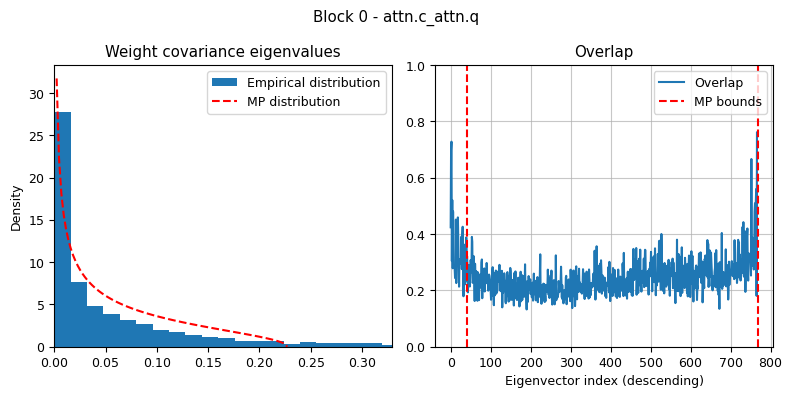

JS distance histogram = 0.251
JS distance kde       = 0.204


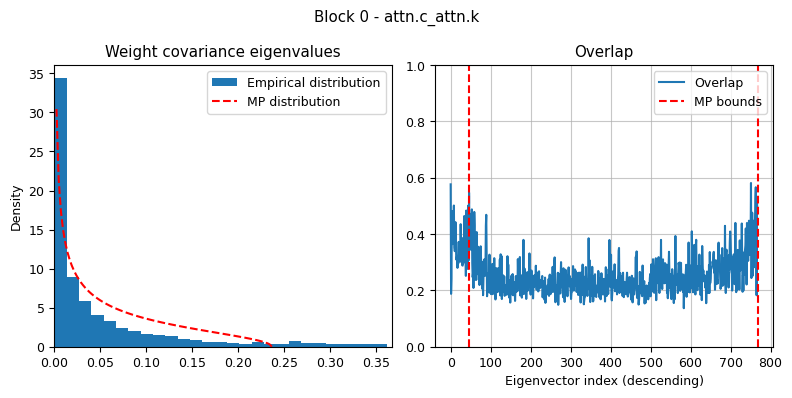

JS distance histogram = 0.184
JS distance kde       = 0.169


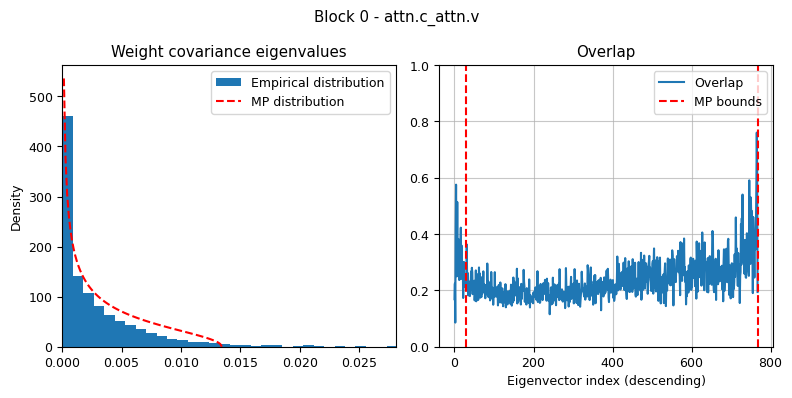

JS distance histogram = 0.389
JS distance kde       = 0.219


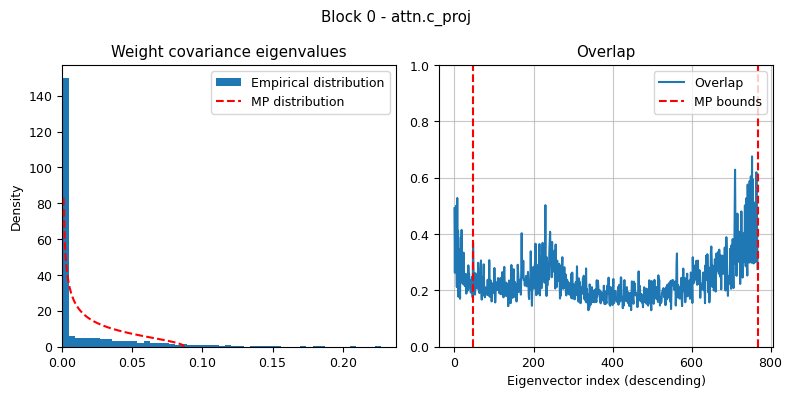

JS distance histogram = 0.257
JS distance kde       = 0.249


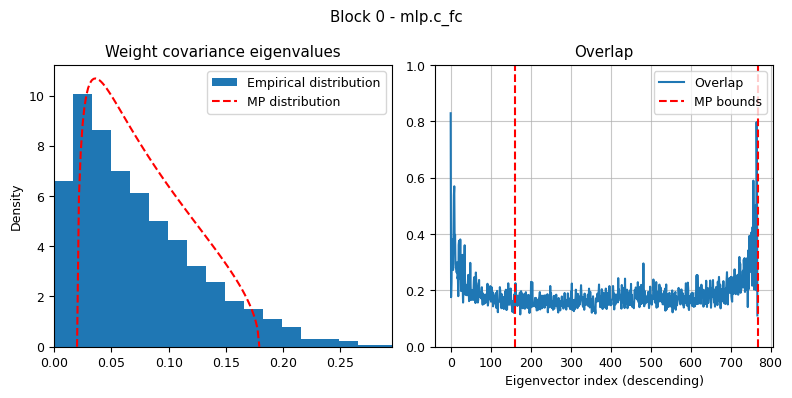

JS distance histogram = 0.230
JS distance kde       = 0.220


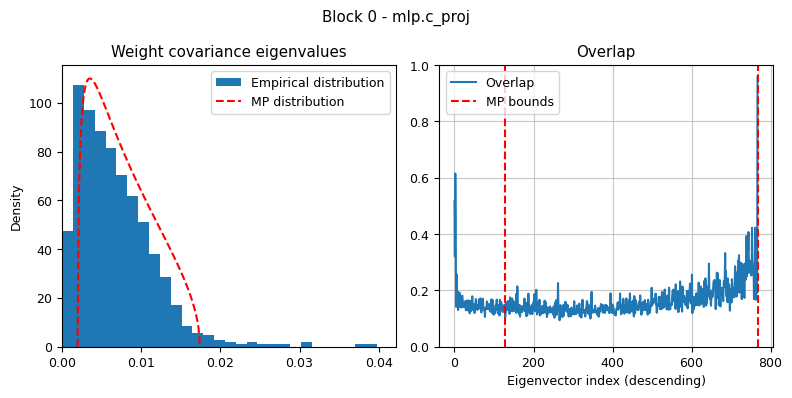

#####

BLOCK 1

#####

JS distance histogram = 0.277
JS distance kde       = 0.194


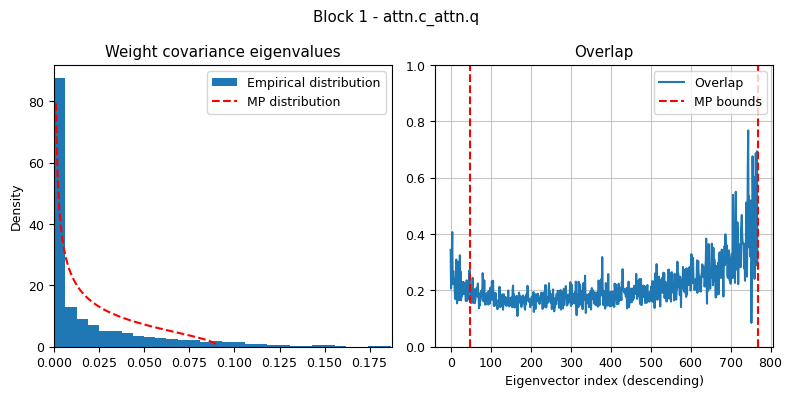

JS distance histogram = 0.264
JS distance kde       = 0.191


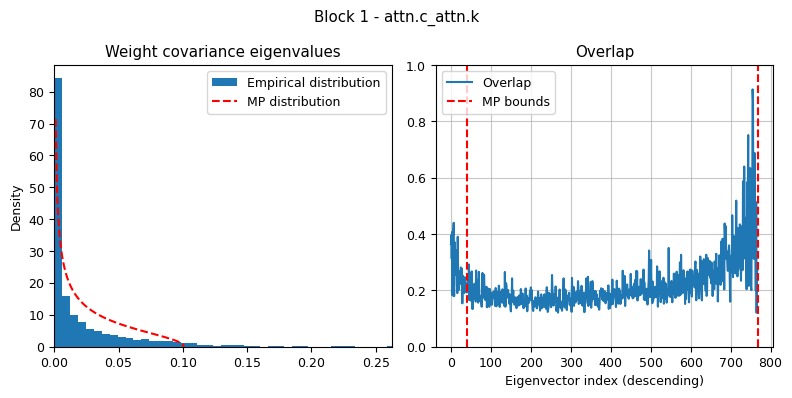

JS distance histogram = 0.199
JS distance kde       = 0.170


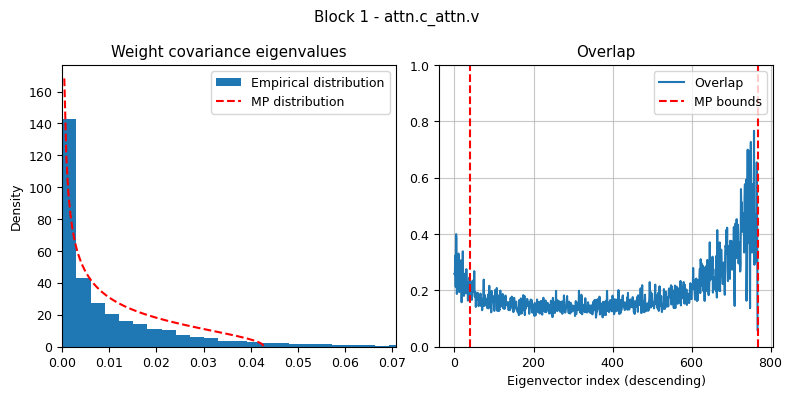

JS distance histogram = 0.242
JS distance kde       = 0.203


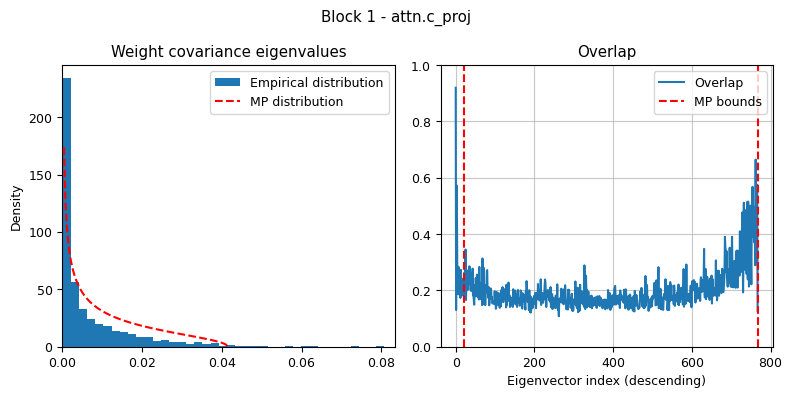

JS distance histogram = 0.222
JS distance kde       = 0.239


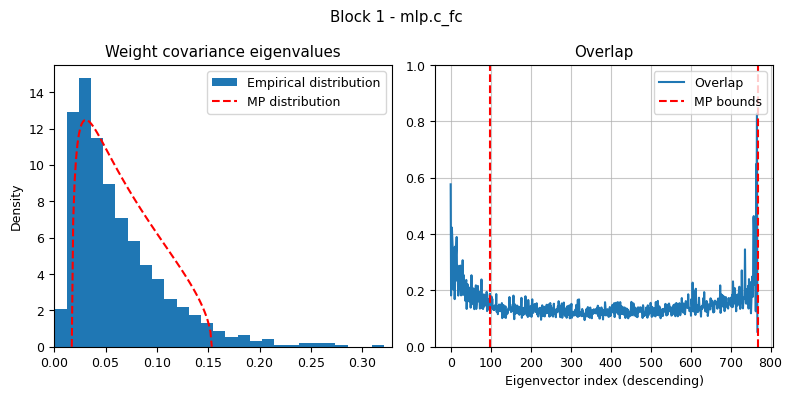

JS distance histogram = 0.239
JS distance kde       = 0.261


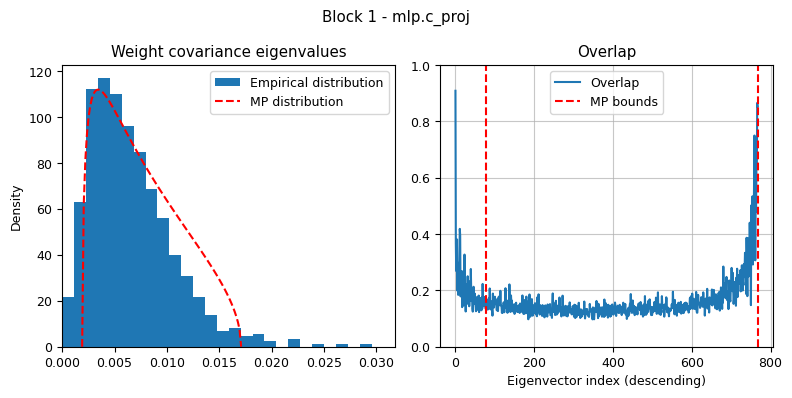

#####

BLOCK 2

#####

JS distance histogram = 0.237
JS distance kde       = 0.185


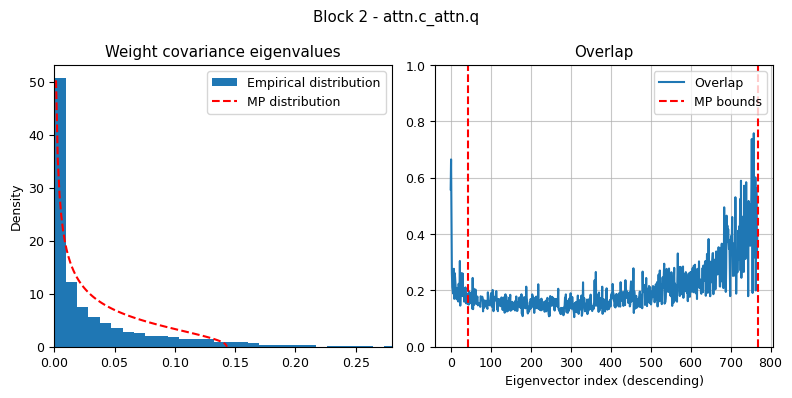

JS distance histogram = 0.212
JS distance kde       = 0.172


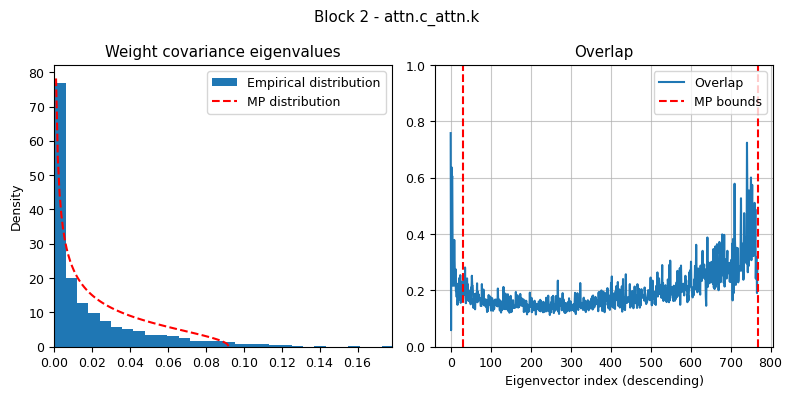

JS distance histogram = 0.187
JS distance kde       = 0.164


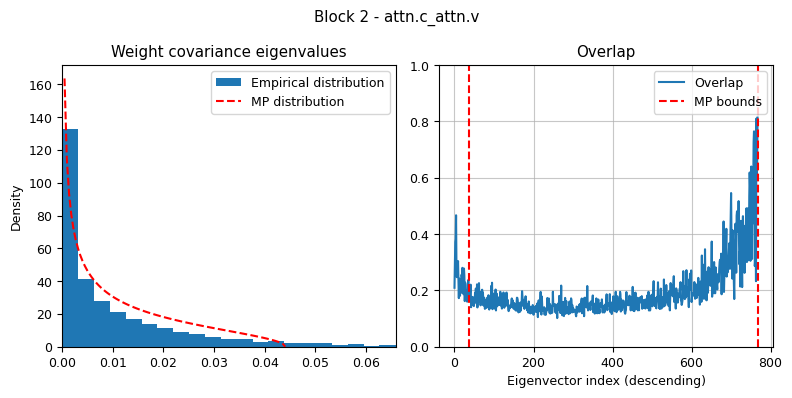

JS distance histogram = 0.197
JS distance kde       = 0.163


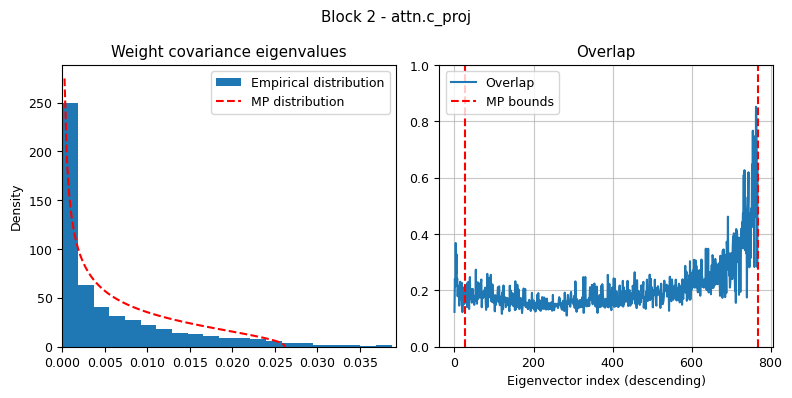

JS distance histogram = 0.229
JS distance kde       = 0.238


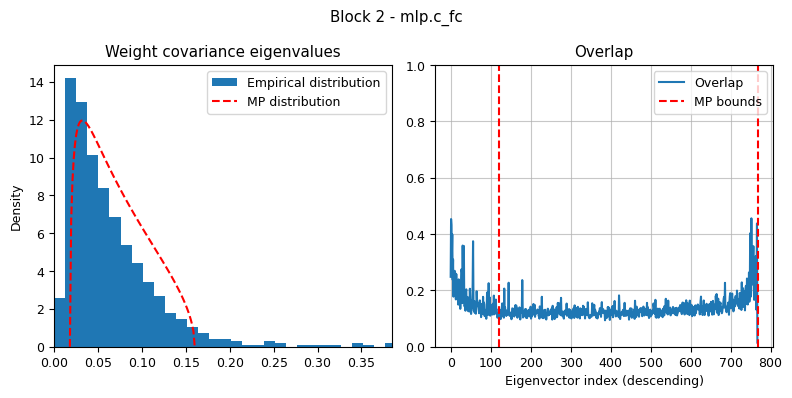

JS distance histogram = 0.243
JS distance kde       = 0.254


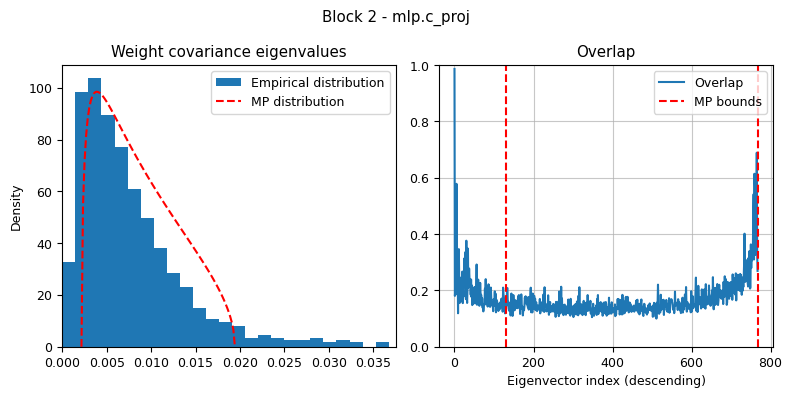

#####

BLOCK 3

#####

JS distance histogram = 0.191
JS distance kde       = 0.171


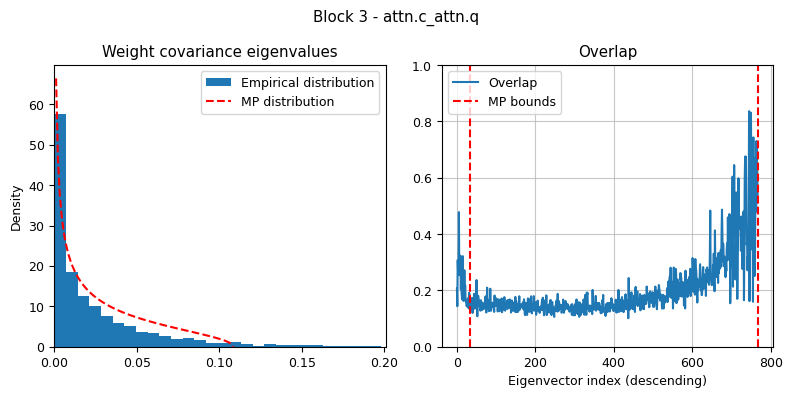

JS distance histogram = 0.170
JS distance kde       = 0.151


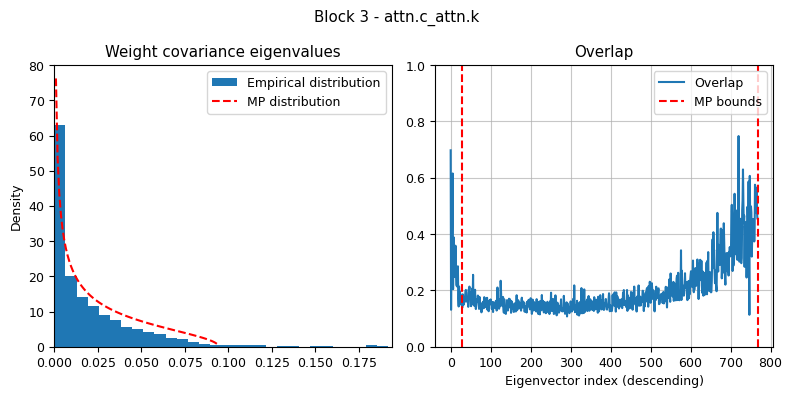

JS distance histogram = 0.213
JS distance kde       = 0.185


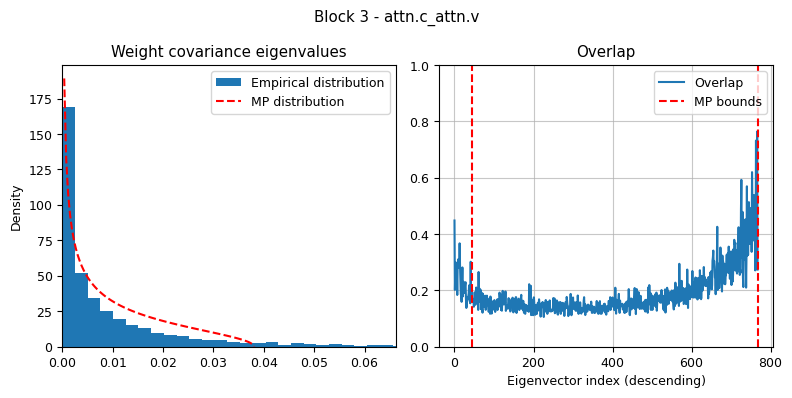

JS distance histogram = 0.205
JS distance kde       = 0.177


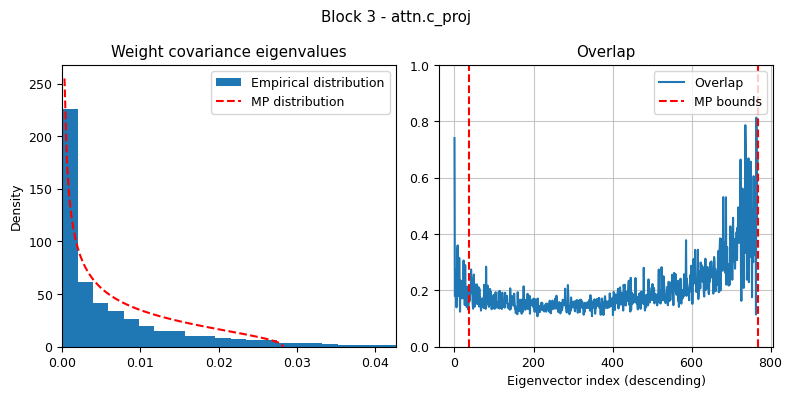

JS distance histogram = 0.242
JS distance kde       = 0.248


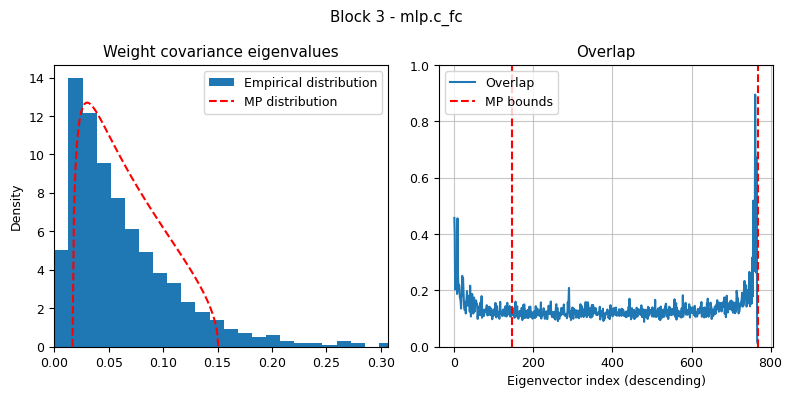

JS distance histogram = 0.262
JS distance kde       = 0.268


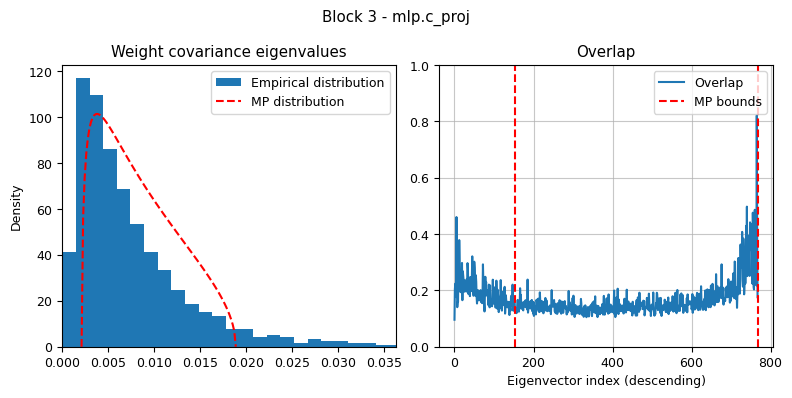

#####

BLOCK 4

#####

JS distance histogram = 0.230
JS distance kde       = 0.191


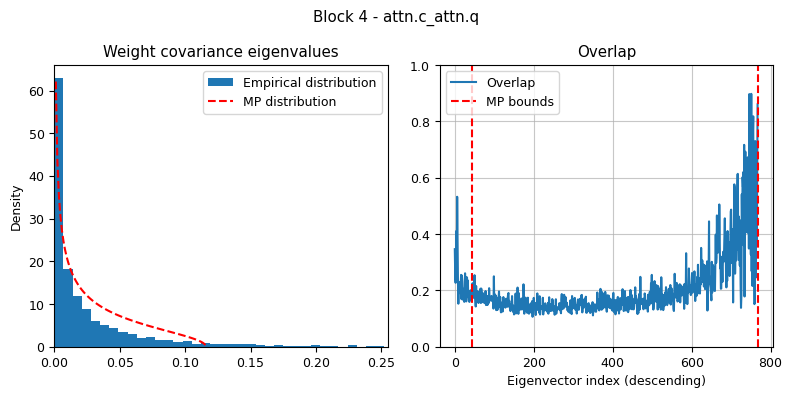

JS distance histogram = 0.192
JS distance kde       = 0.170


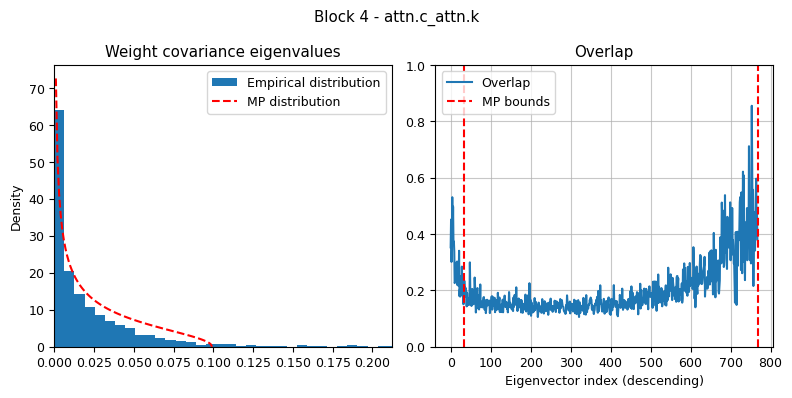

JS distance histogram = 0.207
JS distance kde       = 0.176


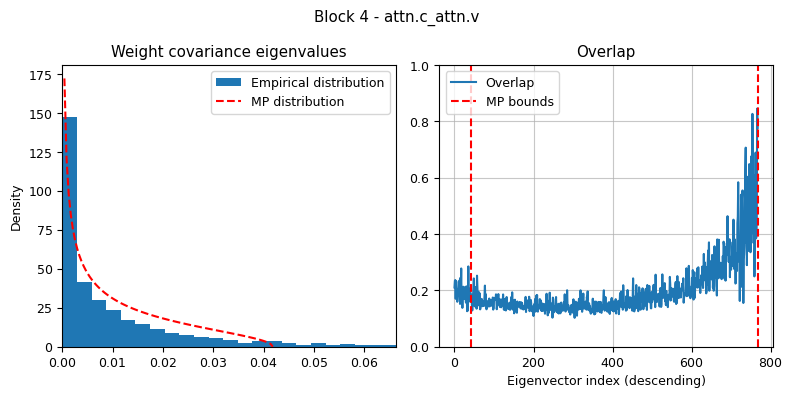

JS distance histogram = 0.214
JS distance kde       = 0.178


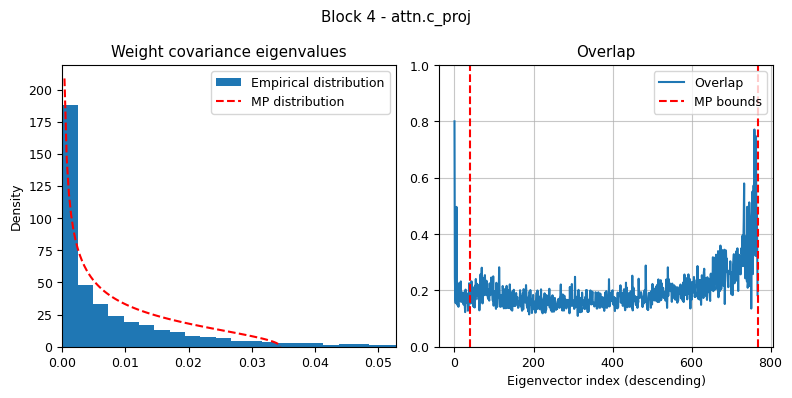

JS distance histogram = 0.264
JS distance kde       = 0.261


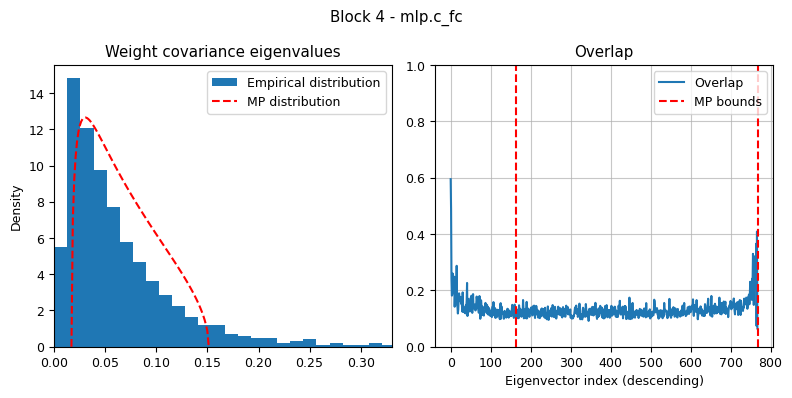

JS distance histogram = 0.262
JS distance kde       = 0.264


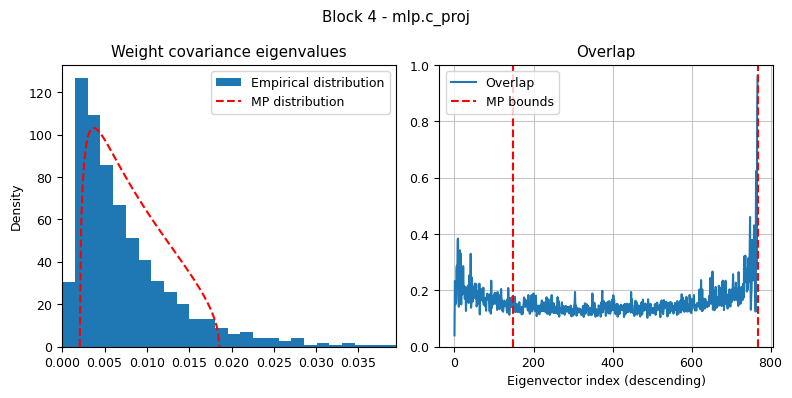

#####

BLOCK 5

#####

JS distance histogram = 0.247
JS distance kde       = 0.210


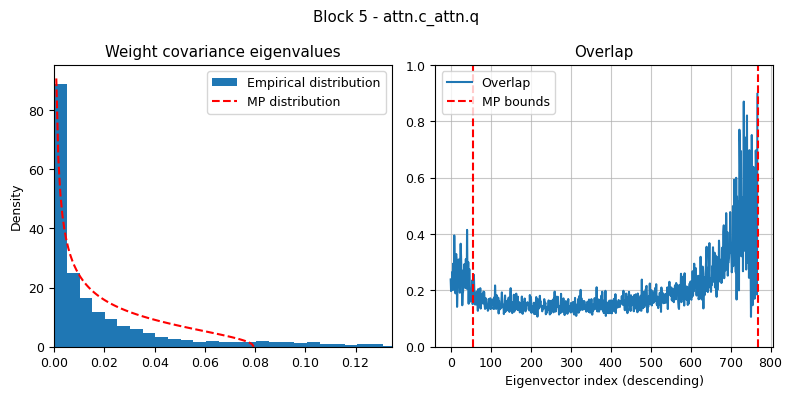

JS distance histogram = 0.251
JS distance kde       = 0.211


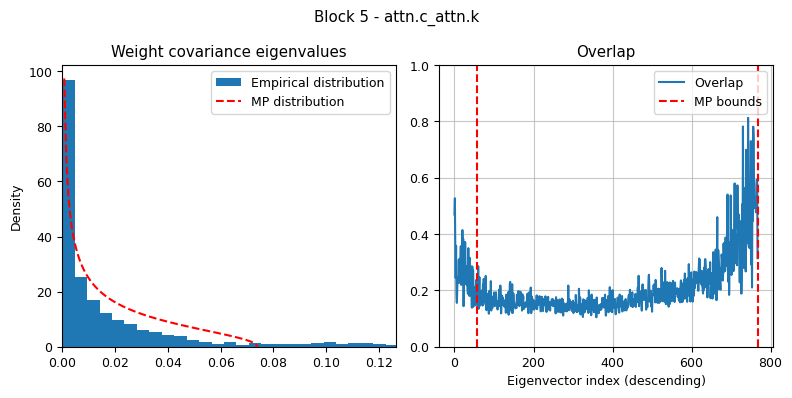

JS distance histogram = 0.217
JS distance kde       = 0.184


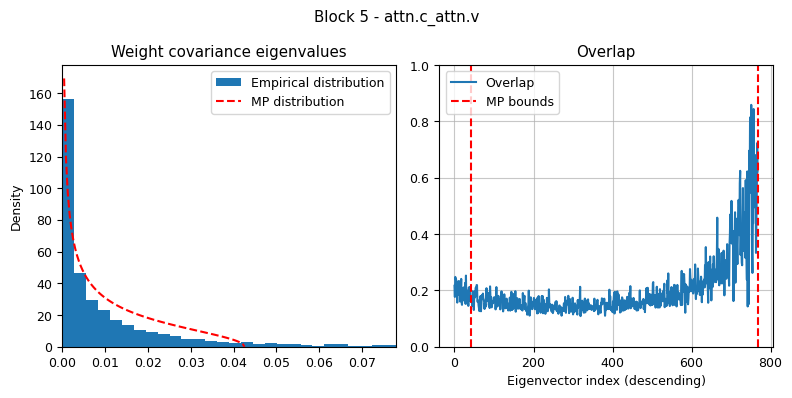

JS distance histogram = 0.185
JS distance kde       = 0.163


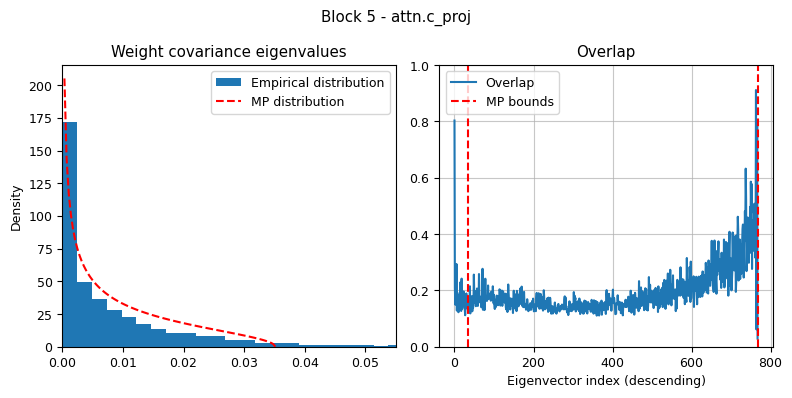

JS distance histogram = 0.270
JS distance kde       = 0.271


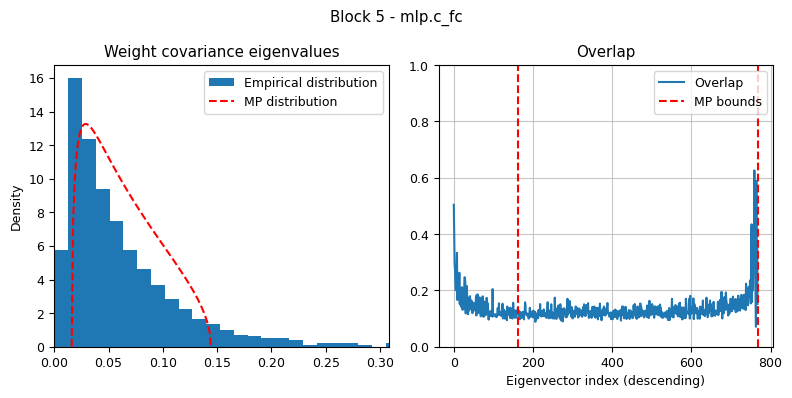

JS distance histogram = 0.248
JS distance kde       = 0.256


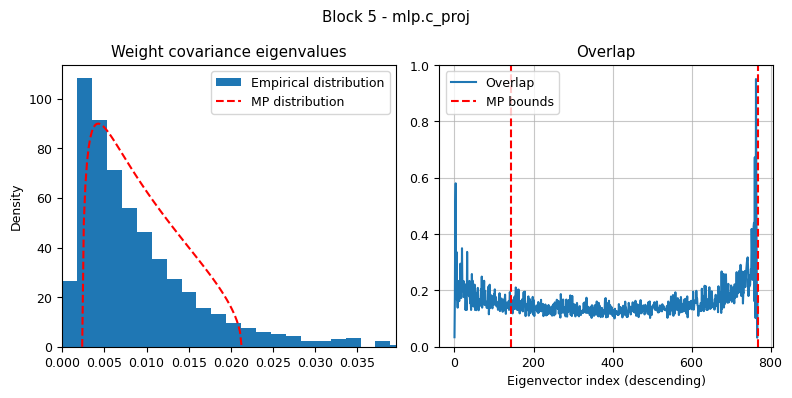

#####

BLOCK 6

#####

JS distance histogram = 0.225
JS distance kde       = 0.183


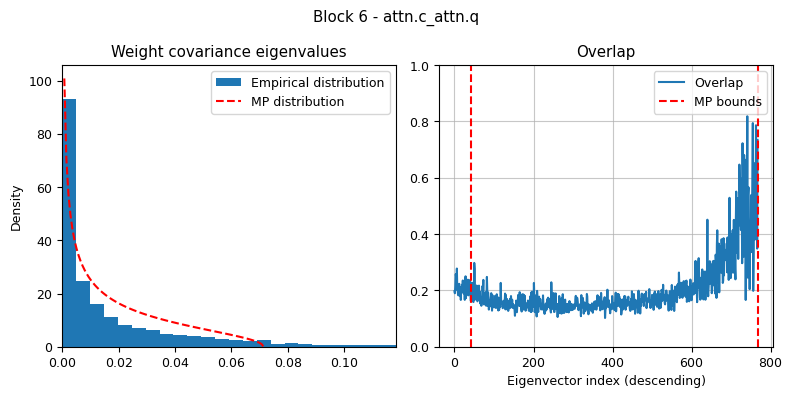

JS distance histogram = 0.182
JS distance kde       = 0.145


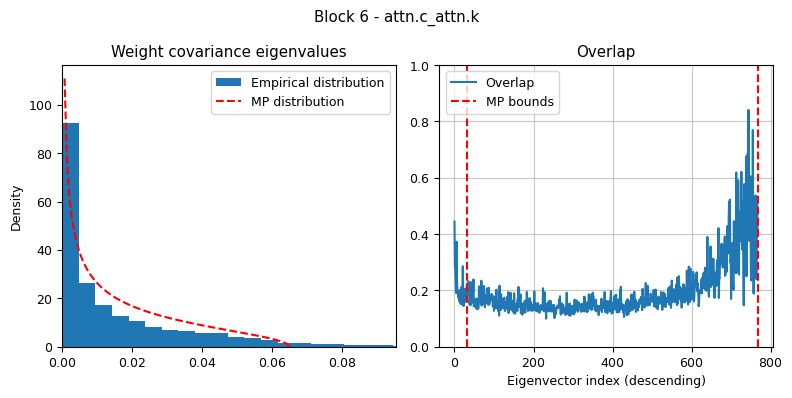

JS distance histogram = 0.224
JS distance kde       = 0.189


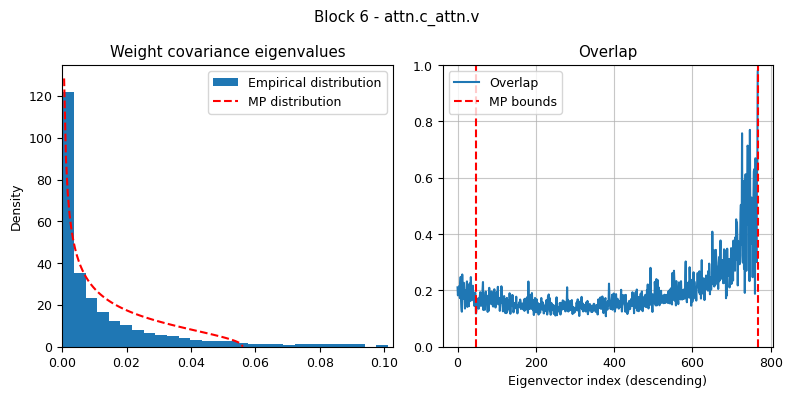

JS distance histogram = 0.223
JS distance kde       = 0.185


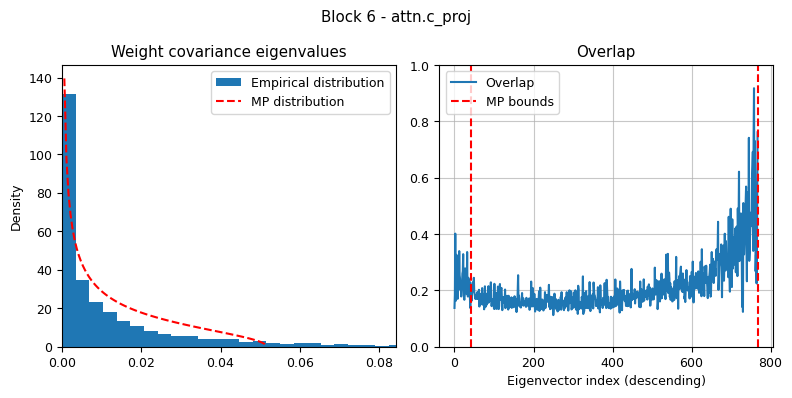

JS distance histogram = 0.265
JS distance kde       = 0.270


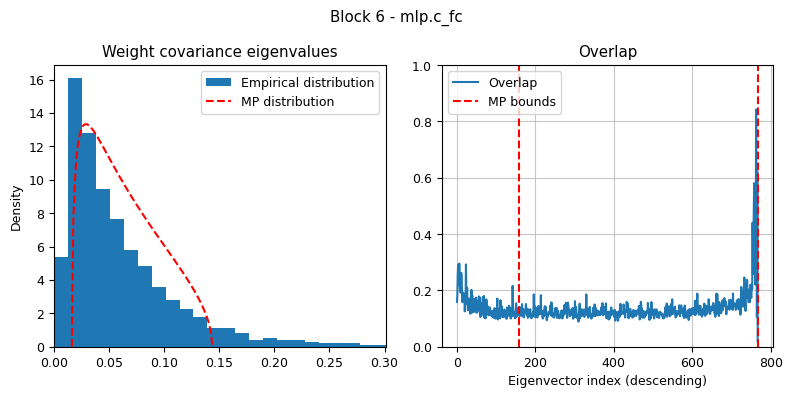

JS distance histogram = 0.238
JS distance kde       = 0.249


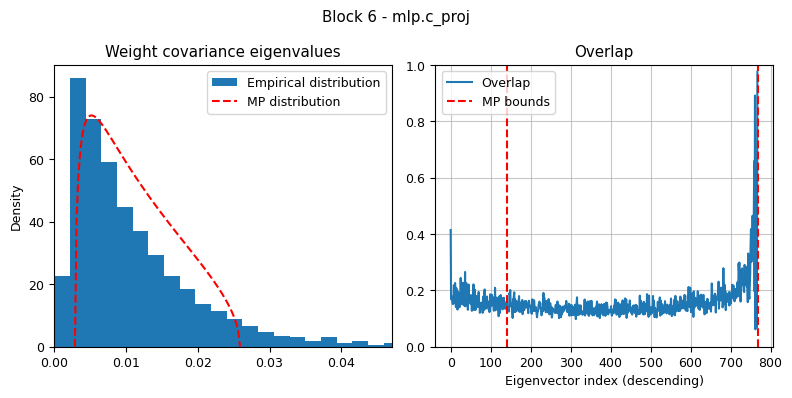

#####

BLOCK 7

#####

JS distance histogram = 0.242
JS distance kde       = 0.201


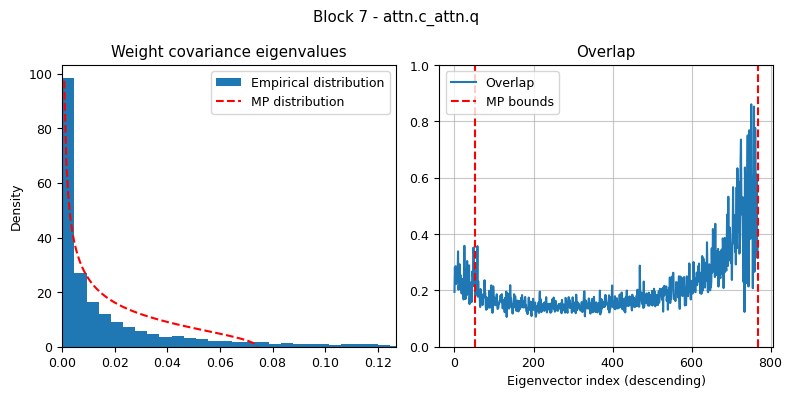

JS distance histogram = 0.246
JS distance kde       = 0.200


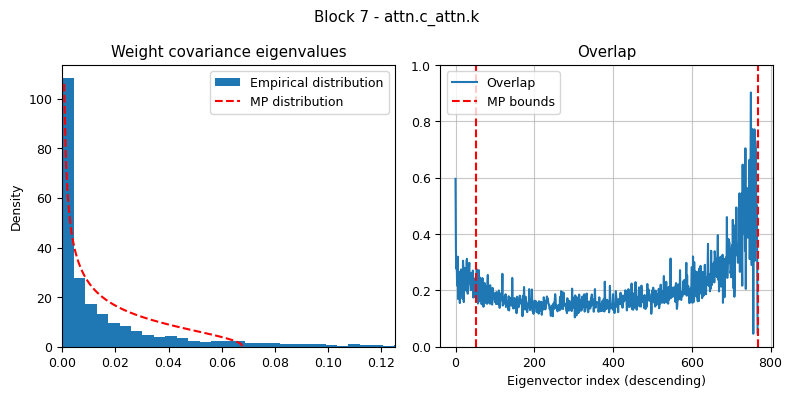

JS distance histogram = 0.175
JS distance kde       = 0.161


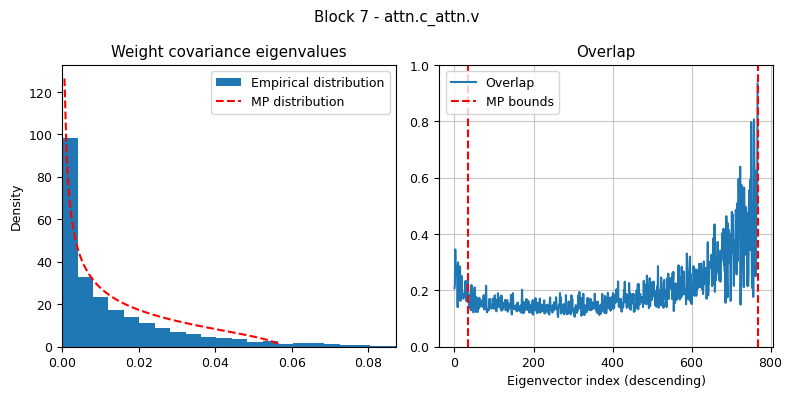

JS distance histogram = 0.202
JS distance kde       = 0.173


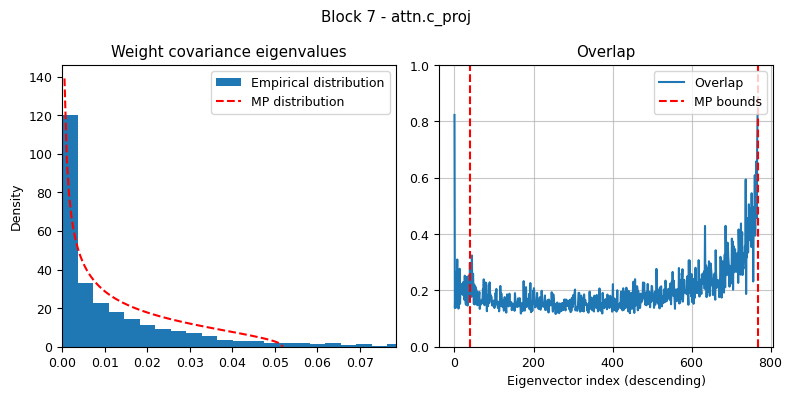

JS distance histogram = 0.262
JS distance kde       = 0.268


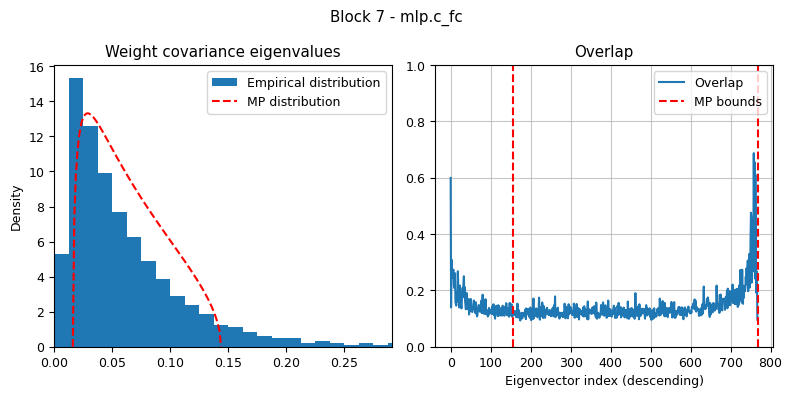

JS distance histogram = 0.228
JS distance kde       = 0.243


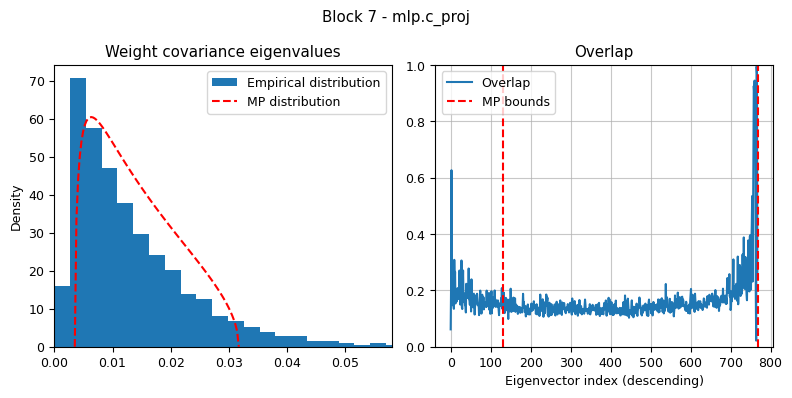

#####

BLOCK 8

#####

JS distance histogram = 0.222
JS distance kde       = 0.185


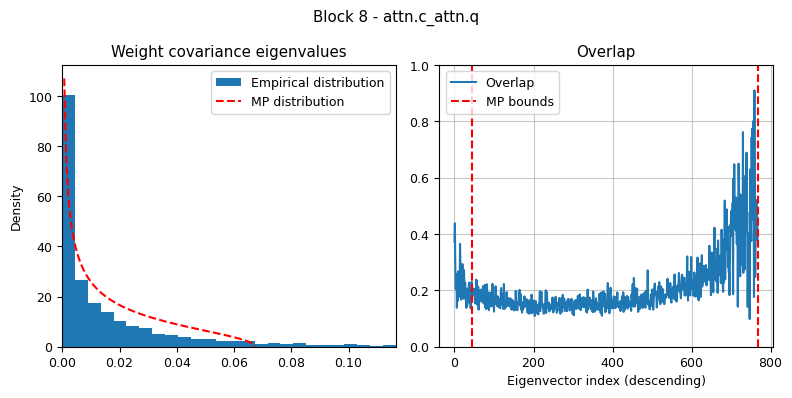

JS distance histogram = 0.193
JS distance kde       = 0.165


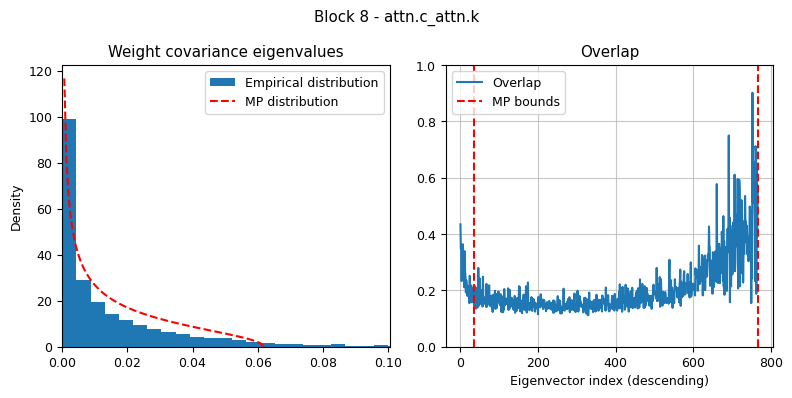

JS distance histogram = 0.161
JS distance kde       = 0.140


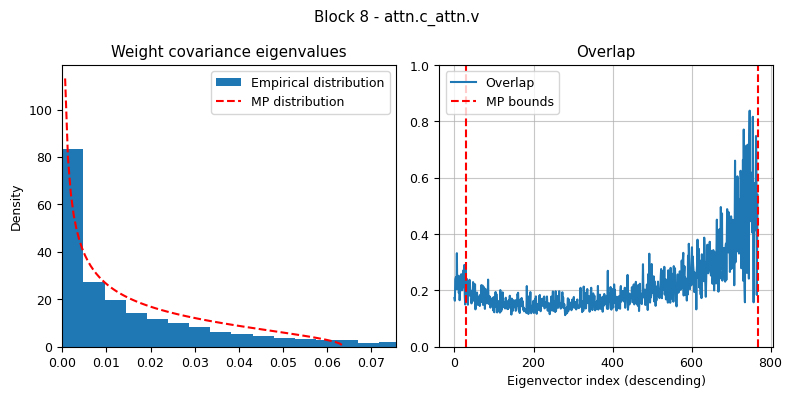

JS distance histogram = 0.209
JS distance kde       = 0.176


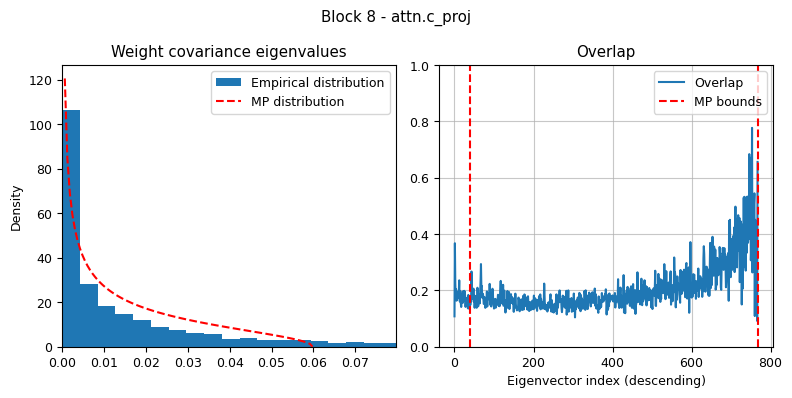

JS distance histogram = 0.242
JS distance kde       = 0.250


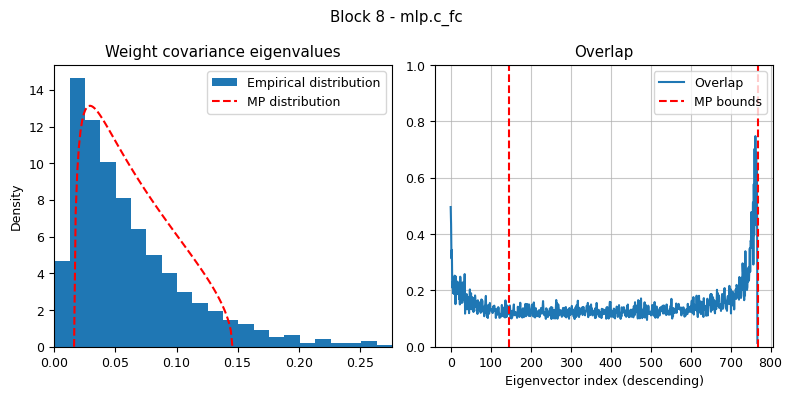

JS distance histogram = 0.250
JS distance kde       = 0.257


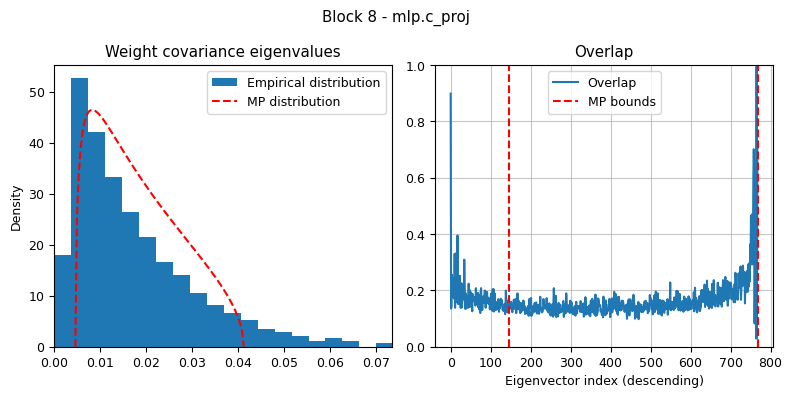

#####

BLOCK 9

#####

JS distance histogram = 0.220
JS distance kde       = 0.188


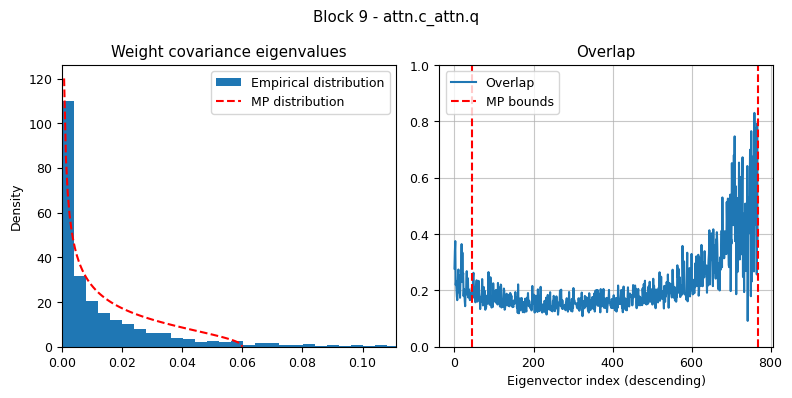

JS distance histogram = 0.205
JS distance kde       = 0.173


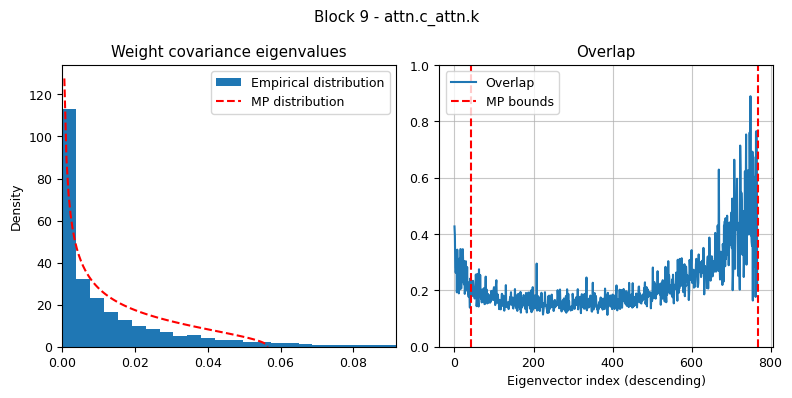

JS distance histogram = 0.147
JS distance kde       = 0.119


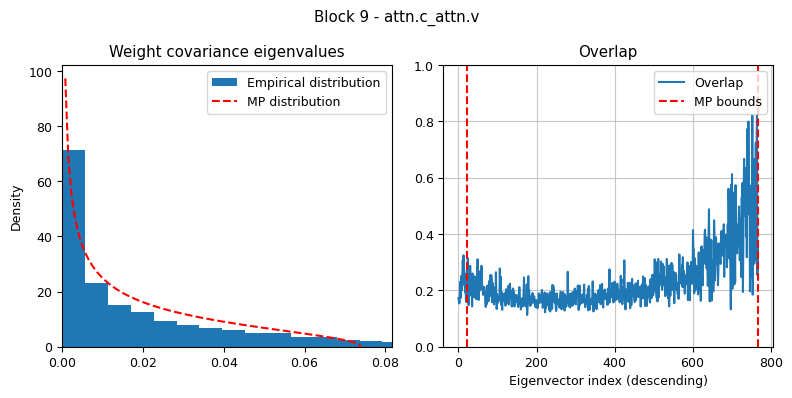

JS distance histogram = 0.119
JS distance kde       = 0.111


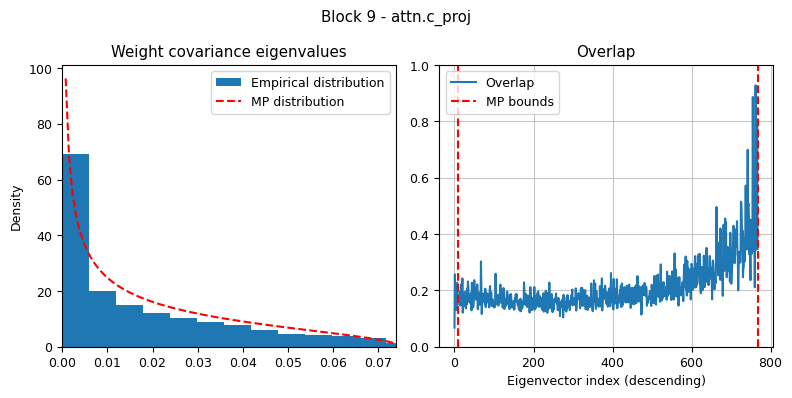

JS distance histogram = 0.257
JS distance kde       = 0.261


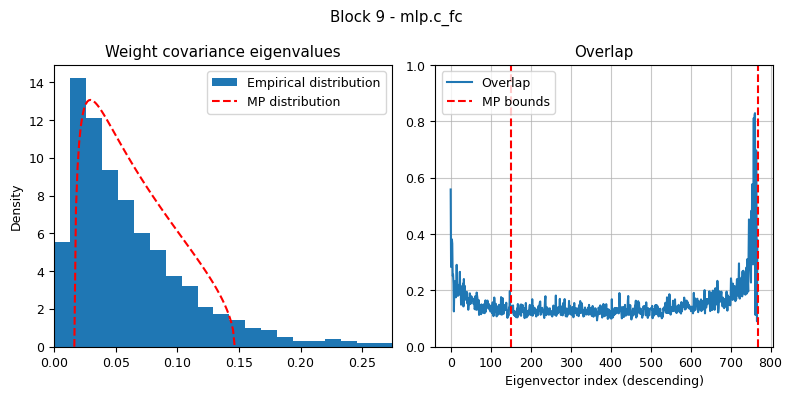

JS distance histogram = 0.245
JS distance kde       = 0.254


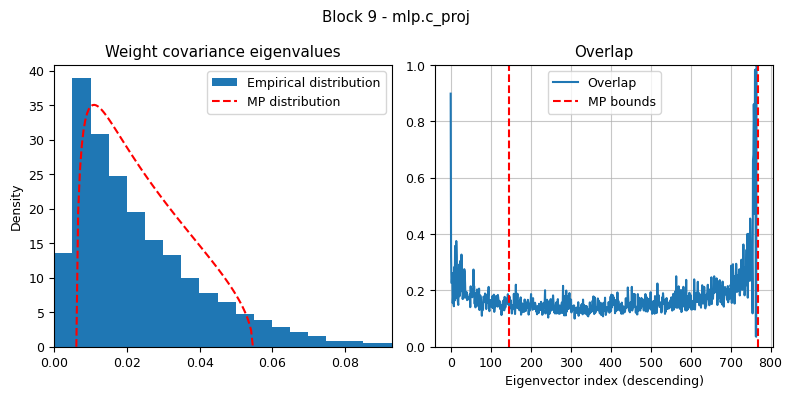

#####

BLOCK 10

#####

JS distance histogram = 0.236
JS distance kde       = 0.200


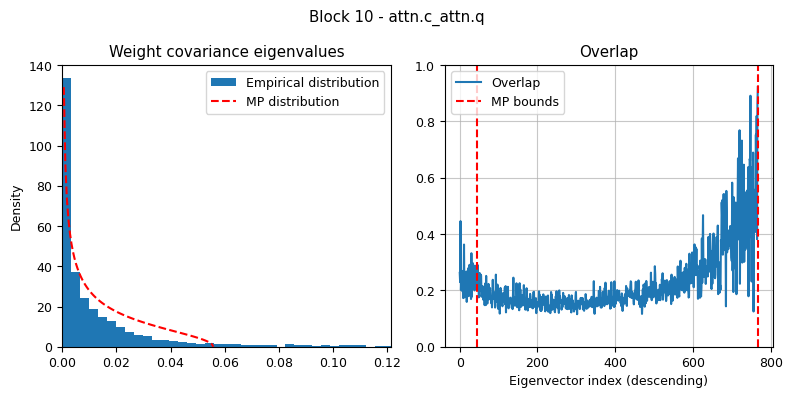

JS distance histogram = 0.243
JS distance kde       = 0.205


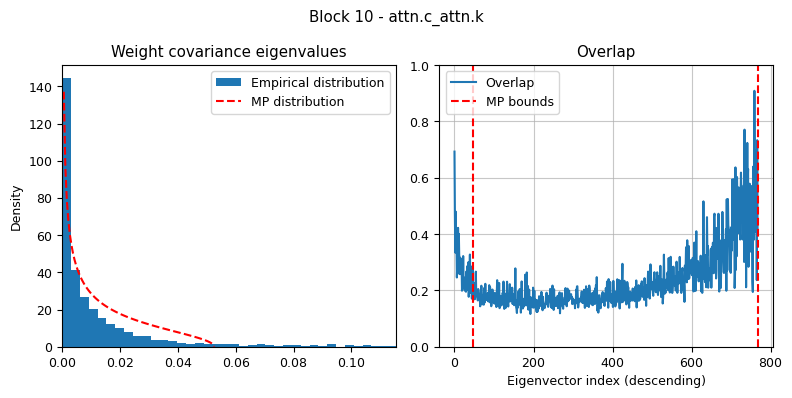

JS distance histogram = 0.199
JS distance kde       = 0.167


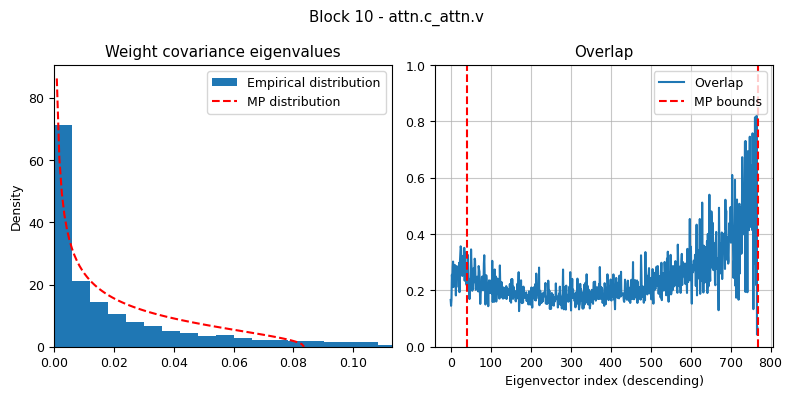

JS distance histogram = 0.107
JS distance kde       = 0.146


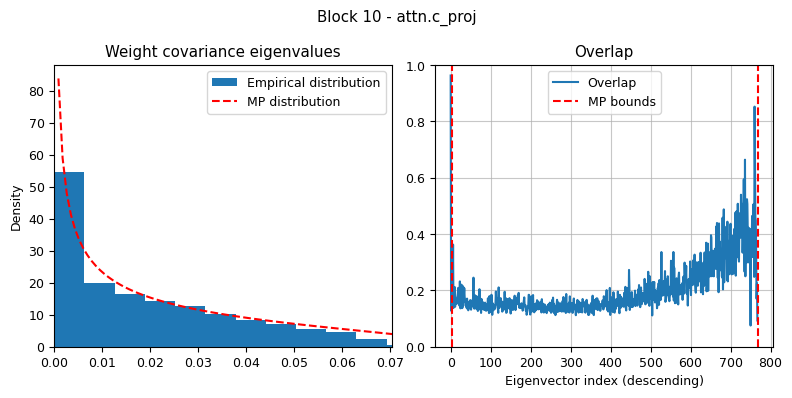

JS distance histogram = 0.257
JS distance kde       = 0.265


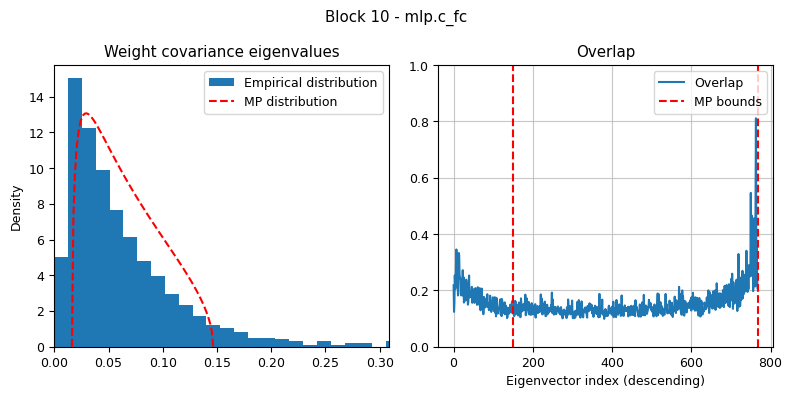

JS distance histogram = 0.225
JS distance kde       = 0.243


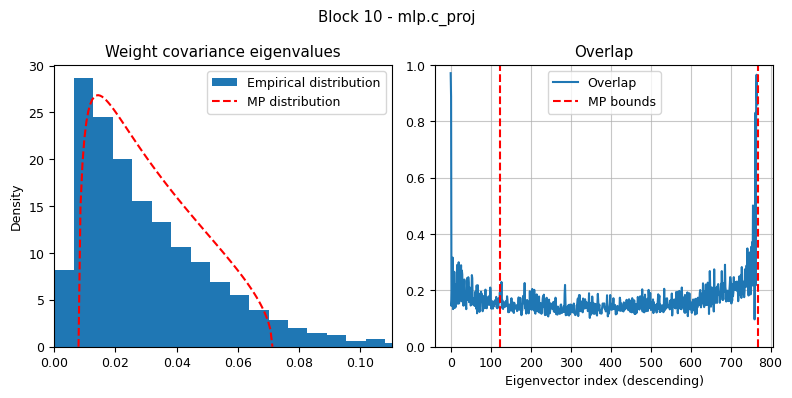

#####

BLOCK 11

#####

JS distance histogram = 0.220
JS distance kde       = 0.185


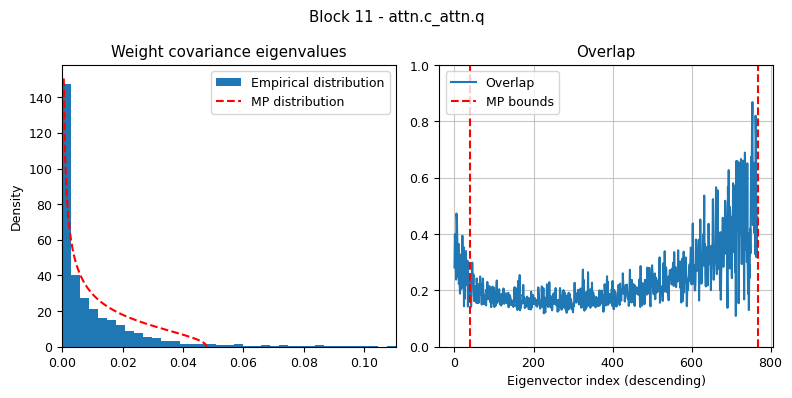

JS distance histogram = 0.230
JS distance kde       = 0.192


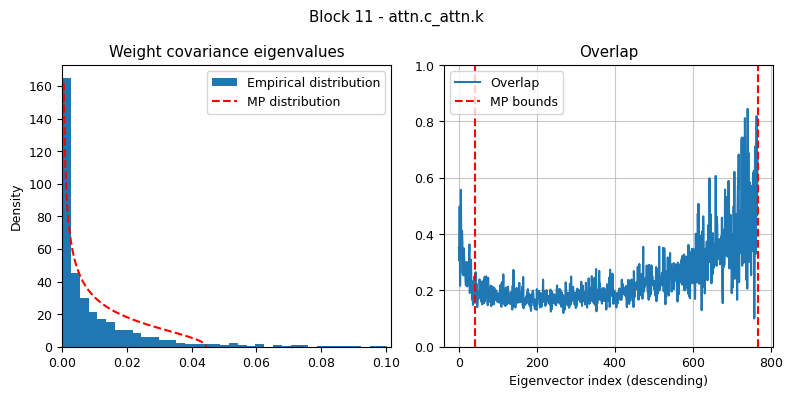

JS distance histogram = 0.190
JS distance kde       = 0.172


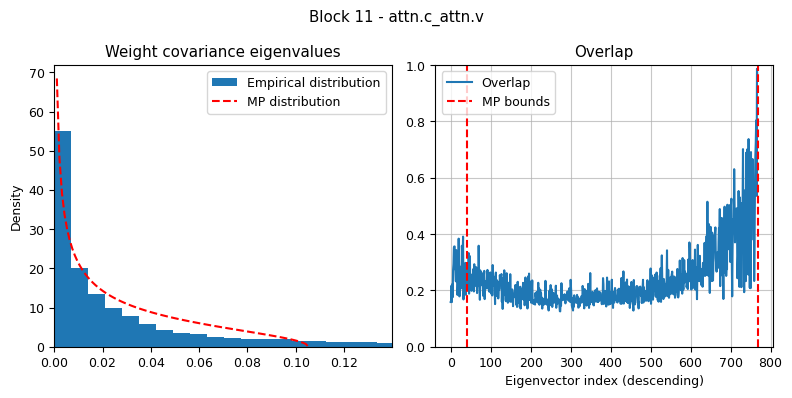

JS distance histogram = 0.226
JS distance kde       = 0.210


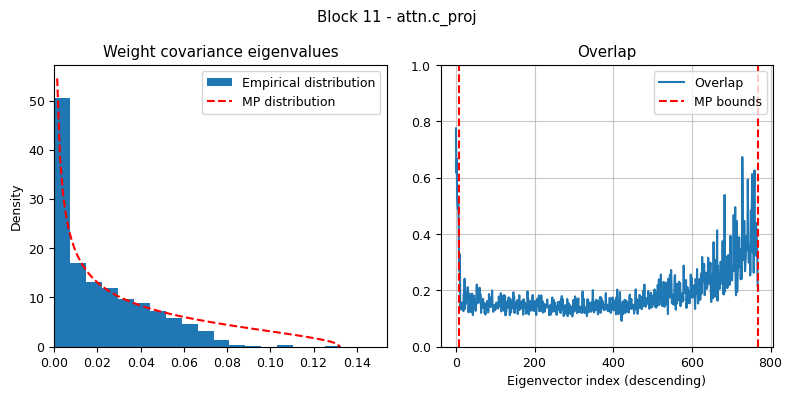

JS distance histogram = 0.258
JS distance kde       = 0.259


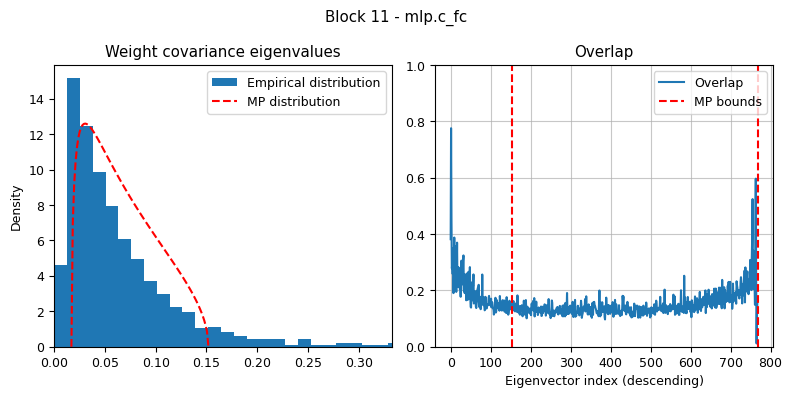

JS distance histogram = 0.195
JS distance kde       = 0.227


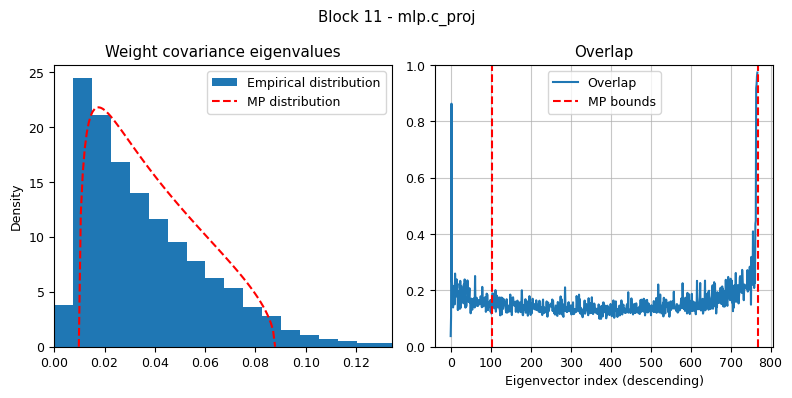

In [13]:
for block_idx in range(N_BLOCKS):

    print("#####\n")
    print(f"BLOCK {block_idx}\n")
    print("#####\n")

    def slice_acts(key):
        """
        Function that returns all entries in `activations[key]` that correspond to the current `block_idx`
        """
        acts = activations[key]
        current_block_acts = []
        for i in range(n_prompts):
            selected_act = acts[i * N_BLOCKS + block_idx]
            n, d = selected_act.shape
            current_block_acts.append(selected_act.reshape(1,n,d))
        return torch.cat(current_block_acts, dim=0)
    

    # dict containing all weights and activations for each sublayer of the current `block_idx`
    sublayers = {
        sublayer: {"W": weights[f"h.{block_idx}.{sublayer}.weight"],"X": slice_acts(sublayer)} for sublayer in activations.keys()
    }

    # performs the decomposition and analysis of only the layers specified
    sublayer_selection = [
        "attn.c_attn.q",
        "attn.c_attn.k",
        "attn.c_attn.v",
        "attn.c_proj",
        "mlp.c_fc",
        "mlp.c_proj"
    ]

    for name, info in sublayers.items():
        if name not in sublayer_selection: continue

        W = info["W"] # weights
        X = info["X"] # buffers
        _, N, D = X.shape # the first dimention is n_prompt

        ###

        # computing the activation covariance matrix as defined in the paper
        x_mean = torch.mean(X, dim = [0,1])
        x_centered = X - x_mean
        act_cov = torch.sum(torch.matmul(torch.transpose(x_centered, 1, 2), x_centered), dim = 0) / (n_prompts * (N - 1))
        
        act_cov_eigvals, act_cov_eigvecs = torch.linalg.eigh(act_cov)
        
        # inverting the ordering (now descending)
        act_cov_eigvals = act_cov_eigvals.flip(0)
        act_cov_eigvecs = act_cov_eigvecs.flip(1)

        ###

        # analyse as projection operator

        # computing the covariance of the weights
        w_mean = torch.mean(W, dim = 0)
        w_centered = W - w_mean
        w_cov = torch.matmul(w_centered.T, w_centered) / (W.shape[0] - 1)

        max_rank = np.min(W.shape)
        w_cov_eigvals, w_cov_eigvecs = torch.linalg.eigh(w_cov)

        # inverting the ordering (now descending)
        w_cov_eigvals = w_cov_eigvals.flip(0)
        w_cov_eigvecs = w_cov_eigvecs.flip(1)

        # removing all eigenvalues we are sure to be 0
        w_cov_eigvals = w_cov_eigvals[:max_rank]
        w_cov_eigvecs = w_cov_eigvecs[:,:max_rank]

        # and the corresponding eigenvectors in the act_cov
        act_cov_eigvals = act_cov_eigvals[:max_rank]
        act_cov_eigvecs = act_cov_eigvecs[:,:max_rank]

        ### 

        # computing the overlap between w and act eigvecs
        # this could signify how much information is transfered from the weights to the buffer
        overlap = torch.max(torch.matmul(w_cov_eigvecs.T, act_cov_eigvecs), dim = 0)[0]

        ###

        # marchenko-pastur parameters

        ratio = W.shape[1] / W.shape[0]

        # std approach
        sigma = torch.std(w_centered) 

        # geometric mean approach
        # this does not work if ratio is close to 1
        # sigma = np.sqrt(np.sqrt(1 + ratio) * torch.prod(w_cov_eigvals**(1 / len(w_cov_eigvals))))

        l_upper = (sigma * (1 + np.sqrt(ratio)))**2
        l_lower = (sigma * (1 - np.sqrt(ratio)))**2

        def mp_distribution(x):
            """
            Marchenko-Pastur distribution
            """
            def _dist(x):
                return torch.sqrt((l_upper - x) * (x - l_lower)) / (2 * torch.pi * sigma**2 * ratio * x)
            
            return torch.where(
                torch.logical_and(x > l_lower, x < l_upper),
                _dist(x),
                0
            )

        x_mp = torch.linspace(l_lower, l_upper, 100) 
        # the first element is removed because if 0 it leads to division error
        if (x_mp[0] < 1e-6):
            x_mp = x_mp[1:]
        mp = mp_distribution(x_mp)
        mp = mp / torch.trapezoid(mp, x_mp) # renormalizing the distribution

        # finding the bordering eigvalues w.r.t. the mp distribution
        eigvals_in_mp_range = torch.logical_and(w_cov_eigvals > l_lower, w_cov_eigvals < l_upper)
        idx_lower = w_cov_eigvals.shape[0] - torch.argmin(torch.arange(w_cov_eigvals.shape[0])[eigvals_in_mp_range])
        idx_upper = w_cov_eigvals.shape[0] - torch.argmax(torch.arange(w_cov_eigvals.shape[0])[eigvals_in_mp_range])

        ###

        # empirical distribution via kde
        def kde_distribution(x, x_eval = None):
            """Estimate distribution using KDE"""
            kde = gaussian_kde(x, bw_method = "silverman")
            if x_eval is None:
                x_eval = torch.linspace(x.min(), x.max(), 1000)
            density = kde(x_eval)
            return x_eval, torch.tensor(density) + 1e-6

        # empirical distribution via histogram binning
        def histogram_distribution(x, bins=1000):
            """Convert points to histogram-based probability distribution"""
            counts, bin_edges = np.histogram(x, bins=bins, density=True)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            bin_width = bin_edges[1] - bin_edges[0]
            probabilities = counts * bin_width  # Normalize to sum to 1
            return torch.tensor(bin_centers), torch.tensor(probabilities)

        # computing the distribution over the same points and normalizing them
        x_eval, hist_density = histogram_distribution(w_cov_eigvals, bins = "fd")
        _, kde_density       = kde_distribution(w_cov_eigvals, x_eval)
        mp_density           = mp_distribution(x_eval)
        hist_density = hist_density / torch.sum(hist_density)
        kde_density  = kde_density  / torch.sum(kde_density)
        mp_density   = mp_density   / torch.sum(mp_density)

        # computing the jensen-shannon distance between empirical and theoretical distributions
        js_kde_distance = jensenshannon(kde_density, mp_density)
        js_hist_distance = jensenshannon(hist_density, mp_density)

        js_hist.append(js_hist_distance)
        js_kde.append(js_kde_distance)

        print(f"JS distance histogram = {js_hist_distance:.3f}")
        print(f"JS distance kde       = {js_kde_distance:.3f}")

        # visualizing the distributions
        if (plotting and plotting_js):
            fig, ax = plt.subplots()
            ax.plot(x_eval, hist_density, label = f"histogram - js = {js_hist_distance:.3f}")
            ax.plot(x_eval, kde_density,  label = f"kde       - js = {js_kde_distance:.3f}")
            ax.plot(x_eval, mp_density, label = "mp")
            ax.set_xlim(0, x_eval[torch.cumsum(kde_density, dim = 0) < 0.99 * torch.sum(kde_density)][-1])
            ax.legend()
            plt.show()
            fig.clear()
            plt.close(fig)

        ###

        # plotting 
        if (plotting):
            counts, bins = np.histogram(w_cov_eigvals.detach().numpy(), bins = "fd", density=True, range = [0, max(w_cov_eigvals.detach().numpy())])

            plt.rcParams.update({'font.size': 9})
            fig, axs = plt.subplots(ncols=2, figsize = (8, 4))

            # w_cov eigenvalues distribution plot
            axs[0].hist(bins[:-1], bins, weights = counts, label = "Empirical distribution")
            axs[0].plot(x_mp, mp, linestyle = "--", color = "r", label = "MP distribution")
            axs[0].set_xlim(0, torch.quantile(w_cov_eigvals, 0.99))
            axs[0].set_title("Weight covariance eigenvalues")
            axs[0].set_ylabel("Density")
            axs[0].legend()

            # overlap plot
            axs[1].plot(np.arange(overlap.shape[0]), overlap, label = "Overlap")
            axs[1].vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, color = "r", linestyle = "--", label = "MP bounds")
            axs[1].grid(alpha = 0.7)
            axs[1].set_ylim(0,1)
            axs[1].set_title("Overlap")
            axs[1].set_xlabel("Eigenvector index (descending)")
            axs[1].legend()

            fig.suptitle(f"Block {block_idx} - {name}")
            fig.tight_layout()
            plt.show()
            fig.clear()
            plt.close(fig)

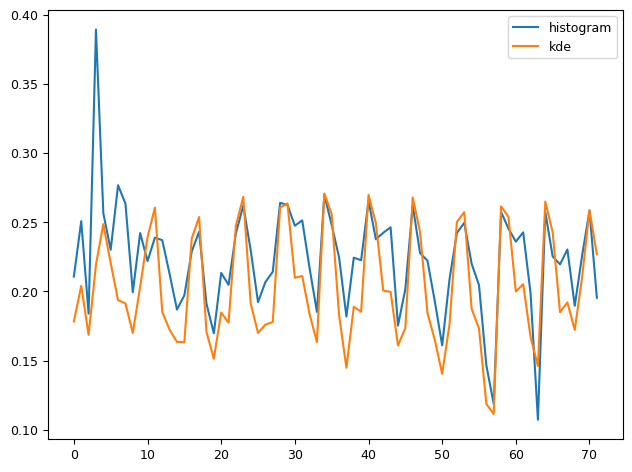

In [14]:
fig, ax = plt.subplots()
ax.plot(js_hist, label = "histogram")
ax.plot(js_kde, label = "kde")
ax.legend()
fig.tight_layout()

# Singular value analysis

#####

BLOCK 0

#####



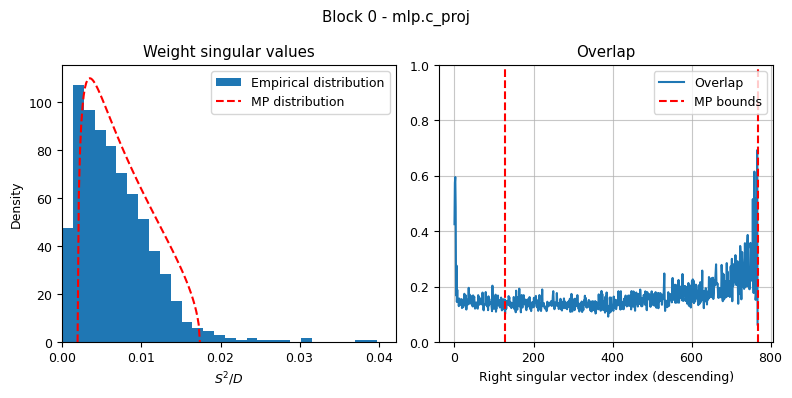

#####

BLOCK 1

#####



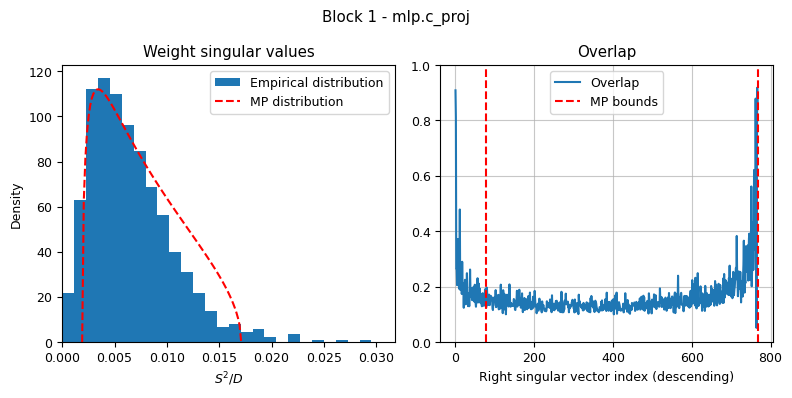

#####

BLOCK 2

#####



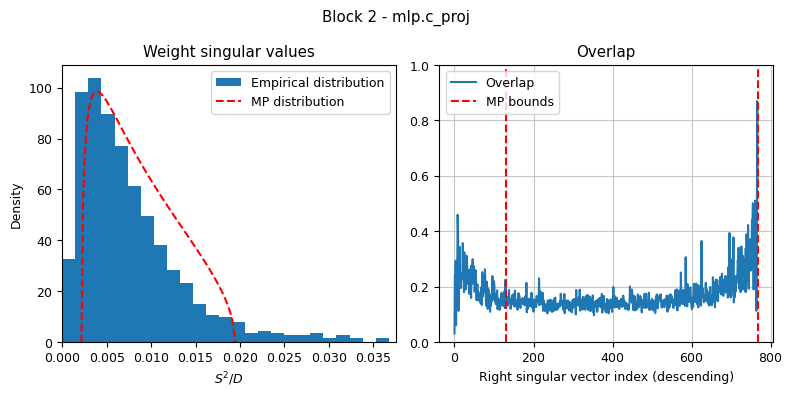

#####

BLOCK 3

#####



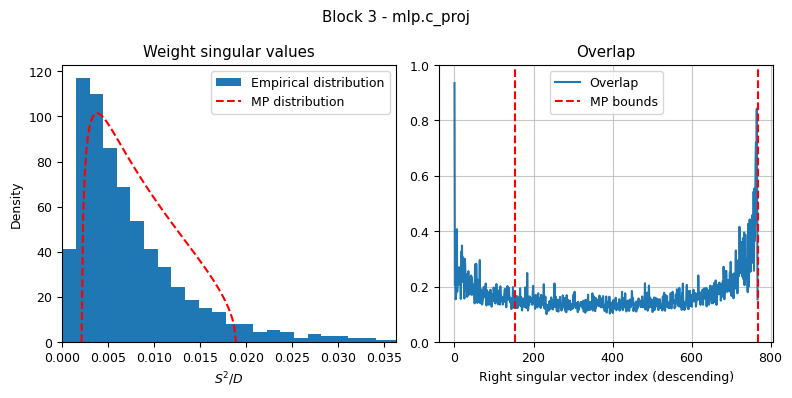

#####

BLOCK 4

#####



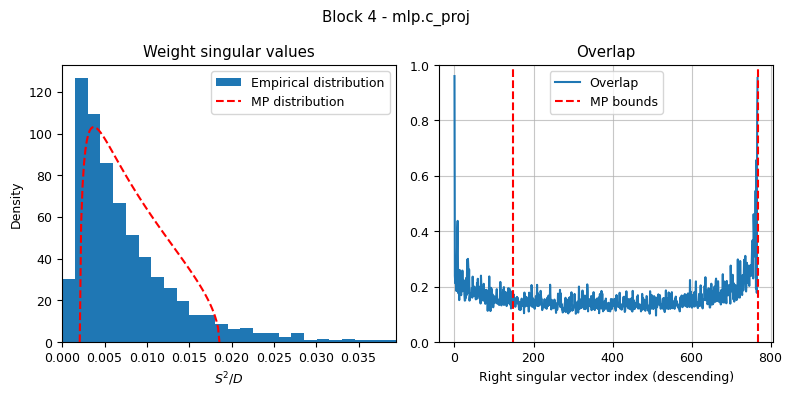

#####

BLOCK 5

#####



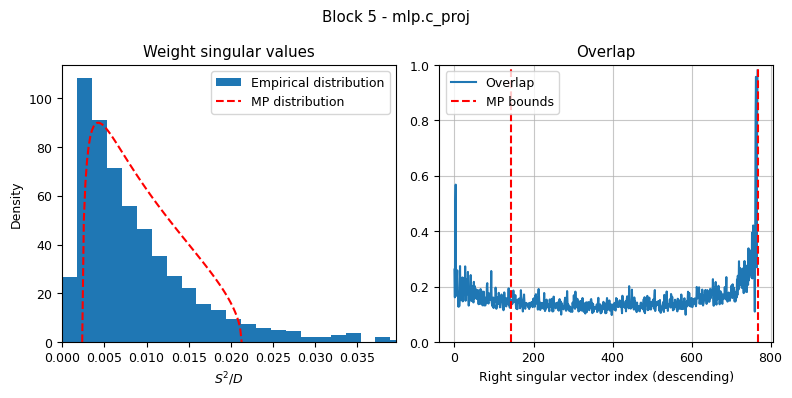

#####

BLOCK 6

#####



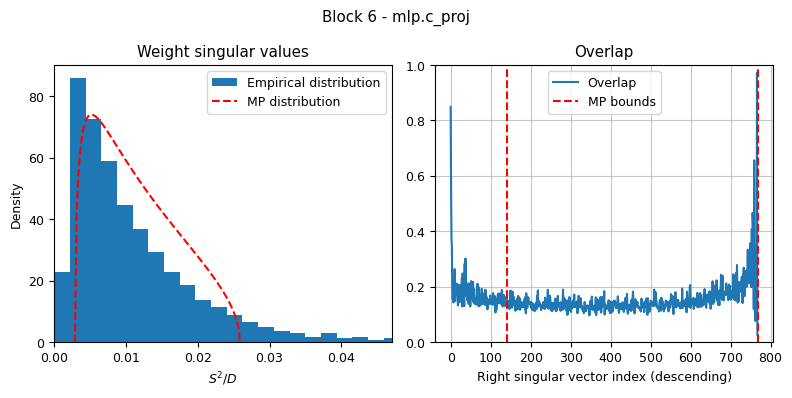

#####

BLOCK 7

#####



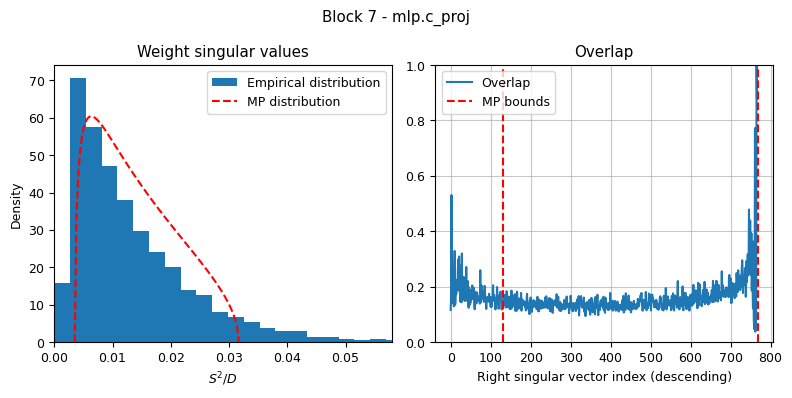

#####

BLOCK 8

#####



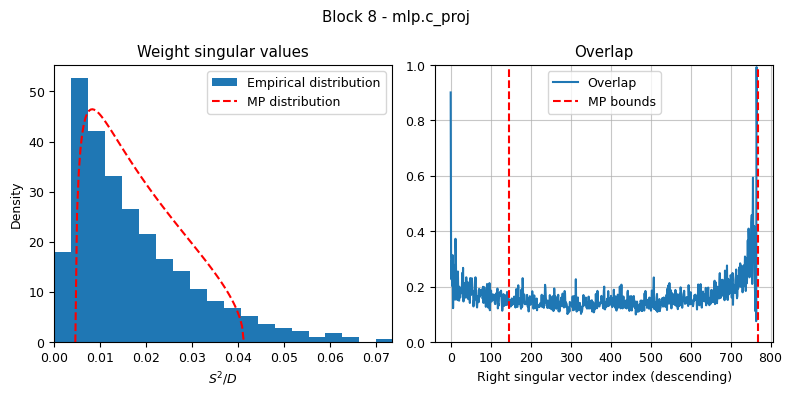

#####

BLOCK 9

#####



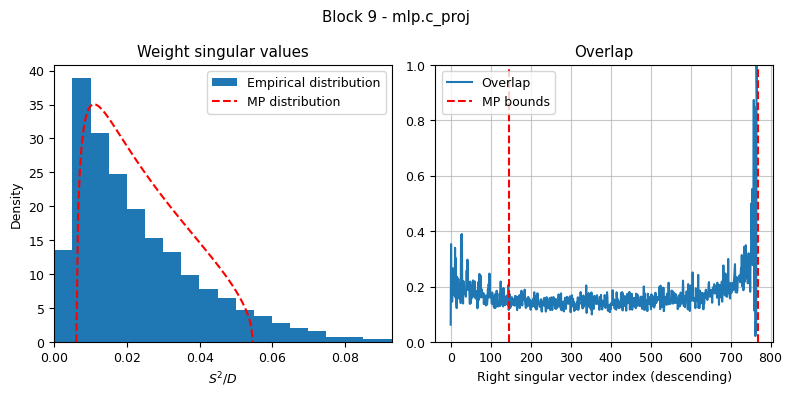

#####

BLOCK 10

#####



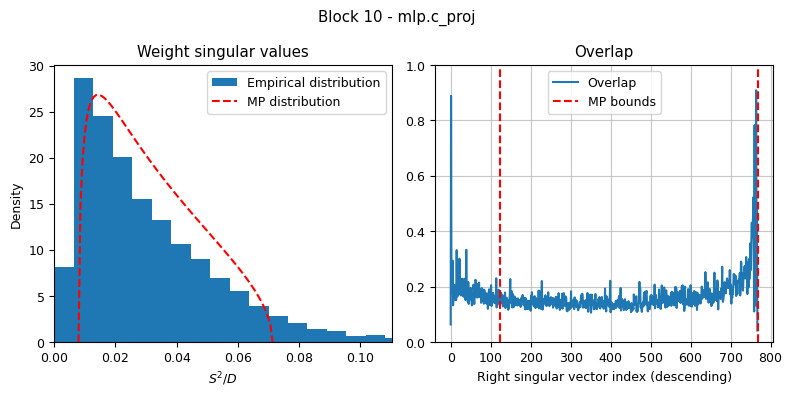

#####

BLOCK 11

#####



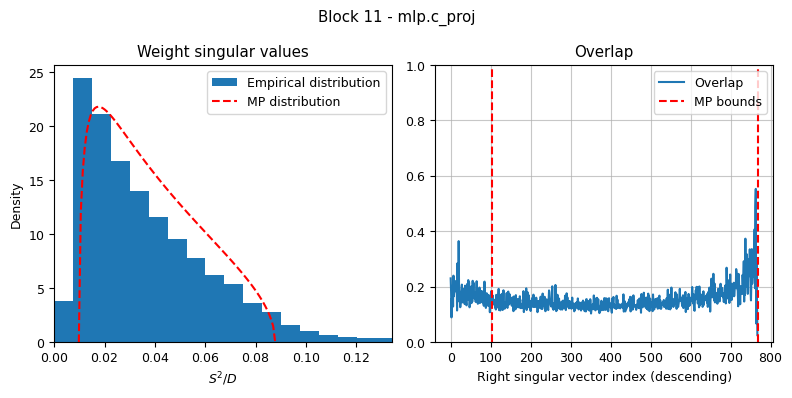

In [16]:
for block_idx in range(N_BLOCKS):

    print("#####\n")
    print(f"BLOCK {block_idx}\n")
    print("#####\n")

    def slice_acts(key):
        """
        Function that returns all entries in `activations[key]` that correspond to the current `block_idx`
        """
        acts = activations[key]
        current_block_acts = []
        for i in range(n_prompts):
            selected_act = acts[i * N_BLOCKS + block_idx]
            n, d = selected_act.shape
            current_block_acts.append(selected_act.reshape(1,n,d))
        return torch.cat(current_block_acts, dim=0)
    

    # dict containing all weights and activations for each sublayer of the current `block_idx`
    sublayers = {
        sublayer: {"W": weights[f"h.{block_idx}.{sublayer}.weight"],"X": slice_acts(sublayer)} for sublayer in activations.keys()
    }

    # performs the decomposition and analysis of only the layers specified
    sublayer_selection = [
        # "attn.c_attn.q"
        # "attn.c_attn.k",
        # "attn.c_attn.v",
        # "attn.c_proj"
        # "mlp.c_fc"
        "mlp.c_proj"
    ]

    for name, info in sublayers.items():
        if name not in sublayer_selection: continue

        W = info["W"] # weights
        X = info["X"] # buffers
        _, N, D = X.shape # the first dimention is n_prompt

        ###

        # computing the activation covariance matrix as defined in the paper
        x_mean = torch.mean(X, dim = [0,1])
        x_centered = X - x_mean
        act_cov = torch.sum(torch.matmul(torch.transpose(x_centered, 1, 2), x_centered), dim = 0) / (n_prompts * (N - 1))
        
        _, act_cov_svals, act_cov_Vt = torch.linalg.svd(act_cov)
        
        ###

        # analyse as projection operator

        # computing the singular values of the centered weight matrix
        w_mean = torch.mean(W, dim = 0)
        w_centered = W - w_mean

        _, w_svals, w_Vt = torch.linalg.svd(w_centered)
        w_eigvals = w_svals**2 / W.shape[0]

        max_rank = np.min(W.shape)

        # removing all eigenvalues we are sure to be 0
        w_eigvals = w_eigvals[:max_rank]
        w_Vt = w_Vt[:max_rank,:]

        # and the corresponding eigenvectors in the act_cov
        act_cov_svals = act_cov_svals[:max_rank]
        act_cov_Vt = act_cov_Vt[:max_rank,:]

        ### 

        # computing the overlap between w and act_cov sigular vectors
        # this could signify how much information is transfered from the weights to the buffer
        overlap = torch.max(torch.matmul(w_Vt, act_cov_Vt.T), dim = 0)[0]

        ###

        # marchenko-pastur parameters

        ratio = W.shape[1] / W.shape[0]

        # std approach
        sigma = torch.std(w_centered) 

        # geometric mean approach
        # this does not work if ratio is close to 1
        # sigma = np.sqrt(np.sqrt(1 + ratio) * torch.prod(w_eigvals**(1 / len(w_eigvals))))

        l_upper = (sigma * (1 + np.sqrt(ratio)))**2
        l_lower = (sigma * (1 - np.sqrt(ratio)))**2

        def mp_distribution(x):
            """
            Marchenko-Pastur distribution
            """
            def _dist(x):
                return torch.sqrt((l_upper - x) * (x - l_lower)) / (2 * torch.pi * sigma**2 * ratio * x)
            
            return torch.where(
                torch.logical_and(x > l_lower, x < l_upper),
                _dist(x),
                0
            )

        x_mp = torch.linspace(l_lower, l_upper, 100) 
        # the first element is removed because if 0 it leads to division error
        if (x_mp[0] < 1e-6):
            x_mp = x_mp[1:]
        mp = mp_distribution(x_mp)
        mp = mp / torch.trapezoid(mp, x_mp) # renormalizing the distribution

        # finding the bordering eigvalues w.r.t. the mp distribution
        eigvals_in_mp_range = torch.logical_and(w_eigvals > l_lower, w_eigvals < l_upper)
        idx_lower = w_eigvals.shape[0] - torch.argmin(torch.arange(w_eigvals.shape[0])[eigvals_in_mp_range])
        idx_upper = w_eigvals.shape[0] - torch.argmax(torch.arange(w_eigvals.shape[0])[eigvals_in_mp_range])

        # plotting 
        if (plotting):
            counts, bins = np.histogram(w_eigvals.detach().numpy(), bins = "fd", density=True, range = [0, max(w_eigvals.detach().numpy())])

            plt.rcParams.update({'font.size': 9})
            fig, axs = plt.subplots(ncols=2, figsize = (8, 4))

            # w_cov eigenvalues distribution plot
            axs[0].hist(bins[:-1], bins, weights = counts, label = "Empirical distribution")
            axs[0].plot(x_mp, mp, linestyle = "--", color = "r", label = "MP distribution")
            axs[0].set_xlim(0, torch.quantile(w_eigvals, 0.99))
            axs[0].set_title("Weight singular values")
            axs[0].set_xlabel(r"$S^2 / D$")
            axs[0].set_ylabel("Density")
            axs[0].legend()

            # overlap plot
            axs[1].plot(np.arange(overlap.shape[0]), overlap, label = "Overlap")
            axs[1].vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, color = "r", linestyle = "--", label = "MP bounds")
            axs[1].grid(alpha = 0.7)
            axs[1].set_ylim(0,1)
            axs[1].set_title("Overlap")
            axs[1].set_xlabel("Right singular vector index (descending)")
            axs[1].legend()

            fig.suptitle(f"Block {block_idx} - {name}")
            fig.tight_layout()
            plt.show()
            fig.clear()
            plt.close(fig)